# Example: YahooFinance Part III - Sustainability Data

[`yfinance`](https://pypi.org/project/yfinance/) is a powerful Python library that provides an easy-to-use interface to access financial data from [**Yahoo Finance**](https://finance.yahoo.com). It allows users to download historical market data, access real-time stock prices, retrieve company financials, and much more. This library is particularly useful for students, researchers, and professionals who need to perform financial analysis, backtest trading strategies, or explore the financial health of companies.

## Key Capabilities of `yfinance`:

1. **<span style="color: #8070fe;">Time-Series Financial Data:</span>**
- Download historical stock prices (OHLCV - Open, High, Low, Close, Volume) for various time intervals (daily, weekly, monthly).
- Access adjusted close prices, which account for dividends and stock splits.
- Retrieve real-time data and intraday data (up to 1-minute intervals).

2. **<span style="color: #8070fe;">Company Financials and Fundamentals:</span>**
- Retrieve company financial statements, including income statements, balance sheets, and cash flow statements.
- Access company information such as market capitalization, P/E ratio, dividend yield, and more.
- Explore analysts' recommendations and earnings history.

3. **<span style="color: #ac0000;">Sustainability Data (ESG Scores):</span>**
- Obtain environmental, social, and governance (ESG) scores, which provide insights into a company's sustainability practices.
- Access additional sustainability-related metrics and controversies associated with companies.

4. **<span style="color: #8070fe;">Corporate Actions and Events:</span>**
- Get data on dividends, stock splits, and other corporate actions.
- Retrieve information on major events, such as earnings releases, that can impact stock prices.

We will focus on retrieving and analyzing sustainability data using `yfinance` and learn how to access environmental, social, and governance (ESG) scores and other sustainability-related metrics. The notebook will also explore how these metrics can be integrated into financial analysis and decision-making processes.

Sustainability data is provided by [**Sustainalytics**](https://www.sustainalytics.com/). consider reviewing an example company, say [**Boeing**](https://www.sustainalytics.com/esg-rating/the-boeing-co/1008249103) to falimiarise yourself with the type of data you will be accessing.

In [273]:
# import yfinance, pandas and os
import yfinance as yf
import pandas as pd
import numpy as np
import os

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [185]:
ticker = "AAPL"
stock = yf.Ticker(ticker)

## Sustainability information

In [187]:
sustainability = stock.sustainability
sustainability

,esgScores
maxAge,86400
totalEsg,17.22
environmentScore,0.46
socialScore,7.39
governanceScore,9.37
ratingYear,2023
ratingMonth,9
highestControversy,3.0
peerCount,55
esgPerformance,UNDER_PERF


### Pinpoint and extract specific values:

In [189]:
sustainability.loc['environmentScore'].values[0]

0.46

### Pinpoint and extract specific values from a more complex and layered objects:

In [191]:
sustainability.loc['peerEnvironmentPerformance']

esgScores    {'min': 0.11, 'avg': 3.0588235294117636, 'max'...
Name: peerEnvironmentPerformance, dtype: object

In [193]:
sustainability.loc['peerEnvironmentPerformance']['esgScores']

{'min': 0.11, 'avg': 3.0588235294117636, 'max': 9.54}

In [195]:
sustainability.loc['peerEnvironmentPerformance']['esgScores']['avg']

3.0588235294117636

We can convert this number to represent a piller risk from 0% (no risk) to 100% (the worst in group!):

In [203]:
stock_score = sustainability.loc['environmentScore'].values[0]
min_score = sustainability.loc['peerEnvironmentPerformance']['esgScores']['min']
max_score = sustainability.loc['peerEnvironmentPerformance']['esgScores']['max']
avg_score = sustainability.loc['peerEnvironmentPerformance']['esgScores']['avg']

stock_percent_risk = (stock_score-min_score)/(max_score-min_score)*100
peergroup_percent_risk = (avg_score-min_score)/(max_score-min_score)*100

print(f"{ticker}'s E piller risk is evaluated at {stock_percent_risk:.2f}%")
print(f"Peer group's E piller risk is evaluated at {peergroup_percent_risk:.2f}%")

AAPL's E piller risk is evaluated at 3.71%
Peer group's E piller risk is evaluated at 31.27%


## Analyse multiple stocks and collect all available ESG data

In [ ]:
# Option A: Specify a list of tickers:
tickers = ['DELL', 'ABNB', 'PANW', 'BKNG', 'UBER', 'IBM', 'SCCO', 'ADBE',
          'NFLX', 'SAP', 'TXN', 'ORCL', 'TTD', 'MU', 'PYPL', 'INTC',
          'GOOG', 'MSFT', 'NVDA', 'AMZN', 'META', 'TSLA', 'AAPL', 'AMD', 'CRM',
          'BA', 'AA', 'MMM', 'AMGN', 'CAT', 'CVX', 'CSCO', 'KO', 'DOW', 'DIS']

In [209]:
# Option B: Specify a list of tickers:
# Open the file in read mode
with open('data/stock_symbol_list_SP500_B.txt', 'r') as file:
    # Read each line and strip any leading/trailing whitespace characters (like newlines)
    tickers = [line.strip() for line in file]

In [211]:
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI'

Now, given the list of tickers above, collect ESG data (if available):

In [214]:
# Initialize an empty list to store data
data = []

# Loop through each ticker and extract the required information
for ticker in tickers:
    stock = yf.Ticker(ticker)
   
    print(ticker)
    
    # Initialize ESG scores to None by default
    environment_score = social_score = governance_score = None
    
    try:
        # Extract the sustainability scores 
        sustainability = stock.sustainability
        
        # If sustainability data is available, extract the relevant ESG scores
        environment_score = sustainability.loc['environmentScore'].values[0]
        social_score = sustainability.loc['socialScore'].values[0]
        governance_score = sustainability.loc['governanceScore'].values[0]
    except KeyError:
        # If the ESG scores are not available, they remain as None
        print(f"Sustainability data is currently not available for {ticker}.")
        
    # Extract other relevant information
    info = stock.info
    market_cap = info.get('marketCap')
    industry_sector = info.get('sector')
    
    # Append the data to the list
    data.append([ticker, environment_score, social_score, governance_score, market_cap, industry_sector])

# Convert the list to a pandas DataFrame
df = pd.DataFrame(data, columns=['Ticker', 'Environment Score', 'Social Score', 'Governance Score', 'Market Cap', 'Industry Sector'])

# Display the DataFrame
df

MMM
AOS
ABT
ABBV
ACN
ATVI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATVI?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=ATVI&crumb=RgsDMFUj4e6


Sustainability data is currently not available for ATVI.


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATVI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATVI&crumb=RgsDMFUj4e6


ADM
ADBE
ADP
AAP
AES
AFL
A
APD
AKAM
ALK


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALK?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=ALK&crumb=RgsDMFUj4e6


Sustainability data is currently not available for ALK.
ALB
ARE
ALGN


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ALGN?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=ALGN&crumb=RgsDMFUj4e6


Sustainability data is currently not available for ALGN.
ALLE
LNT
ALL
GOOGL
GOOG


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GOOG?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=GOOG&crumb=RgsDMFUj4e6


Sustainability data is currently not available for GOOG.
MO
AMZN
AMCR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AMCR?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=AMCR&crumb=RgsDMFUj4e6


Sustainability data is currently not available for AMCR.
AMD


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AMD?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=AMD&crumb=RgsDMFUj4e6


Sustainability data is currently not available for AMD.
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABC?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=ABC&crumb=RgsDMFUj4e6


Sustainability data is currently not available for ABC.


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABC&crumb=RgsDMFUj4e6


AME
AMGN
APH
ADI
ANSS
AON


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AON?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=AON&crumb=RgsDMFUj4e6


Sustainability data is currently not available for AON.
APA
AAPL
AMAT
APTV
ACGL
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BKR?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=BKR&crumb=RgsDMFUj4e6


Sustainability data is currently not available for BKR.
BALL
BAC
BBWI
BAX
BDX
WRB
BBY
BIO
TECH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TECH?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=TECH&crumb=RgsDMFUj4e6


Sustainability data is currently not available for TECH.
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
CHRW
CDNS
CZR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CZR?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=CZR&crumb=RgsDMFUj4e6


Sustainability data is currently not available for CZR.
CPT
CPB
COF
CAH
KMX
CCL
CARR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CARR?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=CARR&crumb=RgsDMFUj4e6


Sustainability data is currently not available for CARR.
CTLT


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CTLT?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=CTLT&crumb=RgsDMFUj4e6


Sustainability data is currently not available for CTLT.
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CDAY?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=CDAY&crumb=RgsDMFUj4e6


Sustainability data is currently not available for CDAY.


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CDAY?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CDAY&crumb=RgsDMFUj4e6


CF
CRL


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CRL?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=CRL&crumb=RgsDMFUj4e6


Sustainability data is currently not available for CRL.
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
CEG


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CEG?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=CEG&crumb=RgsDMFUj4e6


Sustainability data is currently not available for CEG.
COO
CPRT
GLW
CTVA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CTVA?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=CTVA&crumb=RgsDMFUj4e6


Sustainability data is currently not available for CTVA.
CSGP
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FANG?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=FANG&crumb=RgsDMFUj4e6


Sustainability data is currently not available for FANG.
DLR
DFS
DISH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DISH?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=DISH&crumb=RgsDMFUj4e6


Sustainability data is currently not available for DISH.


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DISH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DISH&crumb=RgsDMFUj4e6


DIS
DG
DLTR
D
DPZ
DOV
DOW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DOW?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=DOW&crumb=RgsDMFUj4e6


Sustainability data is currently not available for DOW.
DTE
DUK
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
ELV
LLY
EMR
ENPH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ENPH?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=ENPH&crumb=RgsDMFUj4e6


Sustainability data is currently not available for ENPH.
ETR
EOG
EPAM


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EPAM?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=EPAM&crumb=RgsDMFUj4e6


Sustainability data is currently not available for EPAM.
EQT
EFX
EQIX
EQR
ESS
EL
ETSY


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ETSY?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=ETSY&crumb=RgsDMFUj4e6


Sustainability data is currently not available for ETSY.
RE


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RE?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=RE&crumb=RgsDMFUj4e6


Sustainability data is currently not available for RE.


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RE?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RE&crumb=RgsDMFUj4e6


EVRG


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/EVRG?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=EVRG&crumb=RgsDMFUj4e6


Sustainability data is currently not available for EVRG.
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FAST
FRT
FDX
FITB
FRC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FRC?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=FRC&crumb=RgsDMFUj4e6


Sustainability data is currently not available for FRC.
FSLR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FSLR?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=FSLR&crumb=RgsDMFUj4e6


Sustainability data is currently not available for FSLR.
FE
FIS
FISV


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FISV?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=FISV&crumb=RgsDMFUj4e6


Sustainability data is currently not available for FISV.
FLT


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FLT?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=FLT&crumb=RgsDMFUj4e6


Sustainability data is currently not available for FLT.


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FLT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FLT&crumb=RgsDMFUj4e6


FMC
F
FTNT
FTV
FOXA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FOXA?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=FOXA&crumb=RgsDMFUj4e6


Sustainability data is currently not available for FOXA.
FOX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FOX?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=FOX&crumb=RgsDMFUj4e6


Sustainability data is currently not available for FOX.
BEN
FCX
GRMN
IT
GEHC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GEHC?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=GEHC&crumb=RgsDMFUj4e6


Sustainability data is currently not available for GEHC.
GEN
GNRC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GNRC?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=GNRC&crumb=RgsDMFUj4e6


Sustainability data is currently not available for GNRC.
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
HAL
HIG
HAS
HCA
PEAK


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PEAK?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=PEAK&crumb=RgsDMFUj4e6


Sustainability data is currently not available for PEAK.


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PEAK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PEAK&crumb=RgsDMFUj4e6


HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HWM?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=HWM&crumb=RgsDMFUj4e6


Sustainability data is currently not available for HWM.
HPQ
HUM
HBAN
HII


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HII?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=HII&crumb=RgsDMFUj4e6


Sustainability data is currently not available for HII.
IBM
IEX
IDXX
ITW
ILMN
INCY
IR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/IR?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=IR&crumb=RgsDMFUj4e6


Sustainability data is currently not available for IR.
INTC
ICE
IP
IPG
IFF
INTU
ISRG
IVZ
INVH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/INVH?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=INVH&crumb=RgsDMFUj4e6


Sustainability data is currently not available for INVH.
IQV
IRM
JBHT
JKHY
J
JNJ
JCI
JPM
JNPR
K
KDP


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/KDP?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=KDP&crumb=RgsDMFUj4e6


Sustainability data is currently not available for KDP.
KEY
KEYS
KMB
KIM
KMI
KLAC
KHC
KR
LHX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LHX?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=LHX&crumb=RgsDMFUj4e6


Sustainability data is currently not available for LHX.
LH
LRCX
LW


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LW?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=LW&crumb=RgsDMFUj4e6


Sustainability data is currently not available for LW.
LVS
LDOS
LEN
LNC
LIN


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LIN?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=LIN&crumb=RgsDMFUj4e6


Sustainability data is currently not available for LIN.
LYV


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LYV?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=LYV&crumb=RgsDMFUj4e6


Sustainability data is currently not available for LYV.
LKQ
LMT
L
LOW
LUMN
LYB
MTB
MRO
MPC
MKTX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MKTX?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=MKTX&crumb=RgsDMFUj4e6


Sustainability data is currently not available for MKTX.
MAR
MMC
MLM
MAS
MA
MTCH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MTCH?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=MTCH&crumb=RgsDMFUj4e6


Sustainability data is currently not available for MTCH.
MKC
MCD
MCK
MDT
MRK
META
MET
MTD
MGM
MCHP
MU
MSFT
MAA
MRNA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MRNA?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=MRNA&crumb=RgsDMFUj4e6


Sustainability data is currently not available for MRNA.
MHK
MOH


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MOH?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=MOH&crumb=RgsDMFUj4e6


Sustainability data is currently not available for MOH.
TAP
MDLZ
MPWR


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MPWR?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=MPWR&crumb=RgsDMFUj4e6


Sustainability data is currently not available for MPWR.
MNST
MCO
MS
MOS
MSI
MSCI
NDAQ
NTAP
NFLX
NWL
NEM
NWSA
NWS


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NWS?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=NWS&crumb=RgsDMFUj4e6


Sustainability data is currently not available for NWS.
NEE
NKE
NI
NDSN
NSC
NTRS
NOC
NCLH
NRG
NUE
NVDA
NVR
NXPI
ORLY
OXY
ODFL


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ODFL?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=ODFL&crumb=RgsDMFUj4e6


Sustainability data is currently not available for ODFL.
OMC
ON
OKE
ORCL
OGN


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/OGN?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=OGN&crumb=RgsDMFUj4e6


Sustainability data is currently not available for OGN.
OTIS


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/OTIS?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=OTIS&crumb=RgsDMFUj4e6


Sustainability data is currently not available for OTIS.
PCAR
PKG
PARA
PH
PAYX
PAYC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PAYC?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=PAYC&crumb=RgsDMFUj4e6


Sustainability data is currently not available for PAYC.
PYPL
PNR
PEP
PKI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PKI?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=PKI&crumb=RgsDMFUj4e6


Sustainability data is currently not available for PKI.
PFE
PCG
PM
PSX
PNW
PXD


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PXD?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=PXD&crumb=RgsDMFUj4e6


Sustainability data is currently not available for PXD.


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/PXD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=PXD&crumb=RgsDMFUj4e6


PNC
POOL


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/POOL?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=POOL&crumb=RgsDMFUj4e6


Sustainability data is currently not available for POOL.
PPG
PPL
PFG
PG
PGR
PLD
PRU
PEG
PTC
PSA
PHM
QRVO
PWR
QCOM
DGX
RL
RJF
RTX


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RTX?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=RTX&crumb=RgsDMFUj4e6


Sustainability data is currently not available for RTX.
O
REG
REGN
RF
RSG
RMD
RHI
ROK
ROL
ROP
ROST
RCL
SPGI
CRM
SBAC
SLB
STX
SEE
SRE
NOW
SHW
SBNY
SPG
SWKS
SJM
SNA
SEDG


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SEDG?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=SEDG&crumb=RgsDMFUj4e6


Sustainability data is currently not available for SEDG.
SO
LUV
SWK
SBUX
STT
STLD
STE


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/STE?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=STE&crumb=RgsDMFUj4e6


Sustainability data is currently not available for STE.
SYK
SIVB


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SIVB?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=SIVB&crumb=RgsDMFUj4e6


Sustainability data is currently not available for SIVB.
SYF
SNPS
SYY
TMUS
TROW
TTWO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TTWO?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=TTWO&crumb=RgsDMFUj4e6


Sustainability data is currently not available for TTWO.
TPR
TRGP
TGT
TEL
TDY


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TDY?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=TDY&crumb=RgsDMFUj4e6


Sustainability data is currently not available for TDY.
TFX
TER
TSLA
TXN
TXT
TMO
TJX
TSCO
TT
TDG
TRV
TRMB
TFC


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TFC?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=TFC&crumb=RgsDMFUj4e6


Sustainability data is currently not available for TFC.
TYL


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TYL?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=TYL&crumb=RgsDMFUj4e6


Sustainability data is currently not available for TYL.
TSN
USB
UDR
ULTA
UNP
UAL
UPS
URI
UNH
UHS
VLO
VTR
VRSN
VRSK
VZ
VRTX
VFC
VTRS


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VTRS?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=VTRS&crumb=RgsDMFUj4e6


Sustainability data is currently not available for VTRS.
VICI


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VICI?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=VICI&crumb=RgsDMFUj4e6


Sustainability data is currently not available for VICI.
V
VMC
WAB
WBA
WMT
WBD


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WBD?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=WBD&crumb=RgsDMFUj4e6


Sustainability data is currently not available for WBD.
WM
WAT
WEC
WFC
WELL
WST


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WST?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=WST&crumb=RgsDMFUj4e6


Sustainability data is currently not available for WST.
WDC
WRK


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WRK?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=WRK&crumb=RgsDMFUj4e6


Sustainability data is currently not available for WRK.
WY
WHR
WMB
WTW
GWW
WYNN
XEL
XYL
YUM
ZBRA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ZBRA?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=ZBRA&crumb=RgsDMFUj4e6


Sustainability data is currently not available for ZBRA.
ZBH
ZION


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ZION?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=ZION&crumb=RgsDMFUj4e6


Sustainability data is currently not available for ZION.
ZTS


,Ticker,Environment Score,Social Score,Governance Score,Market Cap,Industry Sector
0,MMM,17.22,13.59,6.54,7.399249e+10,Industrials
1,AOS,7.15,11.87,6.42,1.221014e+10,Industrials
2,ABT,2.27,14.24,8.33,1.970785e+11,Healthcare
3,ABBV,2.38,17.19,10.36,3.467502e+11,Healthcare
4,ACN,0.82,4.61,4.41,2.141920e+11,Technology
...,...,...,...,...,...,...
496,YUM,4.53,11.45,4.12,3.793478e+10,Consumer Cyclical
497,ZBRA,NaN,NaN,NaN,1.781484e+10,Technology
498,ZBH,3.60,14.52,7.89,2.351366e+10,Healthcare
499,ZION,NaN,NaN,NaN,7.319863e+09,Financial Services


In [218]:
# Assuming df is your DataFrame
# Drop rows where any of the ESG score columns have NaN values
df_clean = df.dropna(subset=['Environment Score', 'Social Score', 'Governance Score'])

In [220]:
df_clean

,Ticker,Environment Score,Social Score,Governance Score,Market Cap,Industry Sector
0,MMM,17.22,13.59,6.54,7.399249e+10,Industrials
1,AOS,7.15,11.87,6.42,1.221014e+10,Industrials
2,ABT,2.27,14.24,8.33,1.970785e+11,Healthcare
3,ABBV,2.38,17.19,10.36,3.467502e+11,Healthcare
4,ACN,0.82,4.61,4.41,2.141920e+11,Technology
...,...,...,...,...,...,...
494,XEL,12.70,9.26,4.49,3.413579e+10,Utilities
495,XYL,4.27,8.66,5.19,3.340507e+10,Industrials
496,YUM,4.53,11.45,4.12,3.793478e+10,Consumer Cyclical
498,ZBH,3.60,14.52,7.89,2.351366e+10,Healthcare


Display all rows, not just the top and bottom truncation. 

In [222]:
with pd.option_context('display.max_rows', None):
  display(df_clean)

,Ticker,Environment Score,Social Score,Governance Score,Market Cap,Industry Sector
0,MMM,17.22,13.59,6.54,7.399249e+10,Industrials
1,AOS,7.15,11.87,6.42,1.221014e+10,Industrials
2,ABT,2.27,14.24,8.33,1.970785e+11,Healthcare
3,ABBV,2.38,17.19,10.36,3.467502e+11,Healthcare
4,ACN,0.82,4.61,4.41,2.141920e+11,Technology
6,ADM,16.64,10.15,5.01,2.916188e+10,Consumer Defensive
7,ADBE,1.94,5.99,5.15,2.546934e+11,Technology
8,ADP,2.80,5.54,5.49,1.125147e+11,Technology
9,AAP,0.11,8.29,3.11,2.703843e+09,Consumer Cyclical
10,AES,13.26,8.18,5.26,1.217813e+10,Utilities


To add a bit of a "flavour" to your Pandas dataframe, you can use `.style` option and set formatting to all or selected columns, implement conditional background colored highlights (like in Excel). In the example below, I added two decimal format to E, S, and G scores and made conditional color highlight for E, S, and G using one set of gradient color and market cap using another gradient color. For more color options, see [colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html) help. 

In [228]:
# Apply background gradient only to the selected columns
(df_clean.style
        .format(subset=['Environment Score', 'Social Score', 'Governance Score'], precision=2)
        .format(subset=['Market Cap'], precision=0)
        .background_gradient(subset=['Environment Score', 'Social Score', 'Governance Score'], cmap='YlGn')
        .background_gradient(subset=['Market Cap'], cmap='Blues'))

,Ticker,Environment Score,Social Score,Governance Score,Market Cap,Industry Sector
0,MMM,17.22,13.59,6.54,73992486912,Industrials
1,AOS,7.15,11.87,6.42,12210143232,Industrials
2,ABT,2.27,14.24,8.33,197078466560,Healthcare
3,ABBV,2.38,17.19,10.36,346750189568,Healthcare
4,ACN,0.82,4.61,4.41,214192013312,Technology
6,ADM,16.64,10.15,5.01,29161881600,Consumer Defensive
7,ADBE,1.94,5.99,5.15,254693376000,Technology
8,ADP,2.80,5.54,5.49,112514719744,Technology
9,AAP,0.11,8.29,3.11,2703842560,Consumer Cyclical
10,AES,13.26,8.18,5.26,12178127872,Utilities


### Analyse a specific industry only

In [246]:
# Example industry sector you want to filter
industry = 'Technology'
# Filter the DataFrame for the specific industry
industry_df = df_clean[df_clean['Industry Sector'] == industry]

In [248]:
(industry_df.style
        .format(subset=['Environment Score', 'Social Score', 'Governance Score'], precision=2)
        .format(subset=['Market Cap'], precision=0)
        .background_gradient(subset=['Environment Score', 'Social Score', 'Governance Score'], cmap='YlGn')
        .background_gradient(subset=['Market Cap'], cmap='Blues'))

,Ticker,Environment Score,Social Score,Governance Score,Market Cap,Industry Sector
4,ACN,0.82,4.61,4.41,214192013312,Technology
7,ADBE,1.94,5.99,5.15,254693376000,Technology
8,ADP,2.80,5.54,5.49,112514719744,Technology
14,AKAM,3.00,7.09,6.93,15431407616,Technology
39,APH,7.32,4.64,7.60,81229357056,Technology
40,ADI,9.27,6.68,6.98,116596416512,Technology
41,ANSS,3.51,7.32,5.07,28087801856,Technology
44,AAPL,0.46,7.39,9.37,3481738936320,Technology
45,AMAT,4.49,2.97,5.28,162621915136,Technology
48,ANET,0.40,8.88,7.39,111015387136,Technology


#### Use a bar plot to compare stocks within the industry 

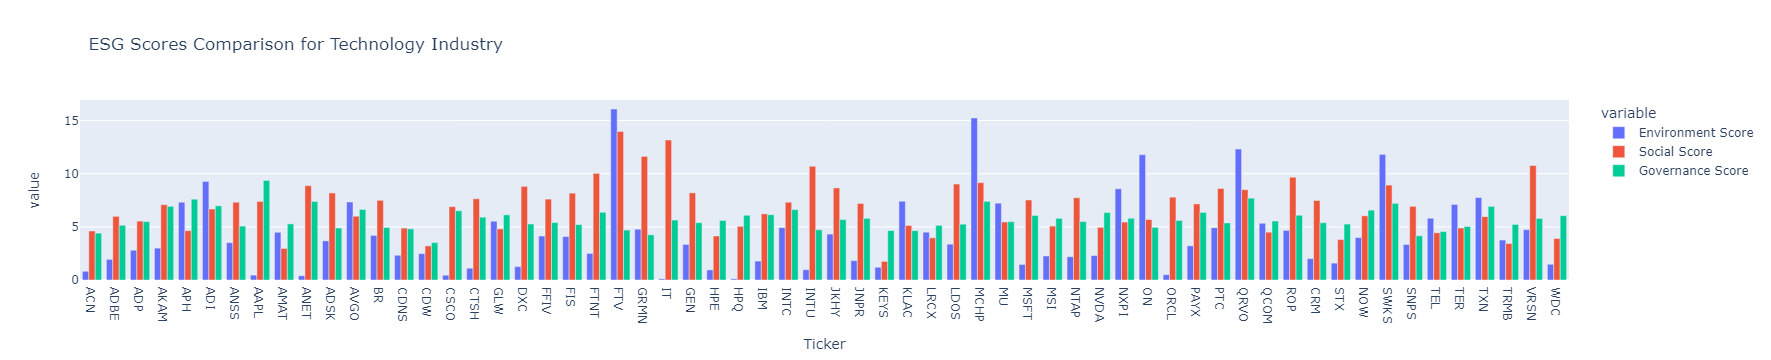

In [256]:
# Create a Plotly bar plot to compare the scores
fig = px.bar(industry_df, 
             x='Ticker', 
             y=['Environment Score', 'Social Score', 'Governance Score'], 
             title=f'ESG Scores Comparison for {industry} Industry', 
             barmode='group',
             orientation='v')

# Show the plot
fig.show()

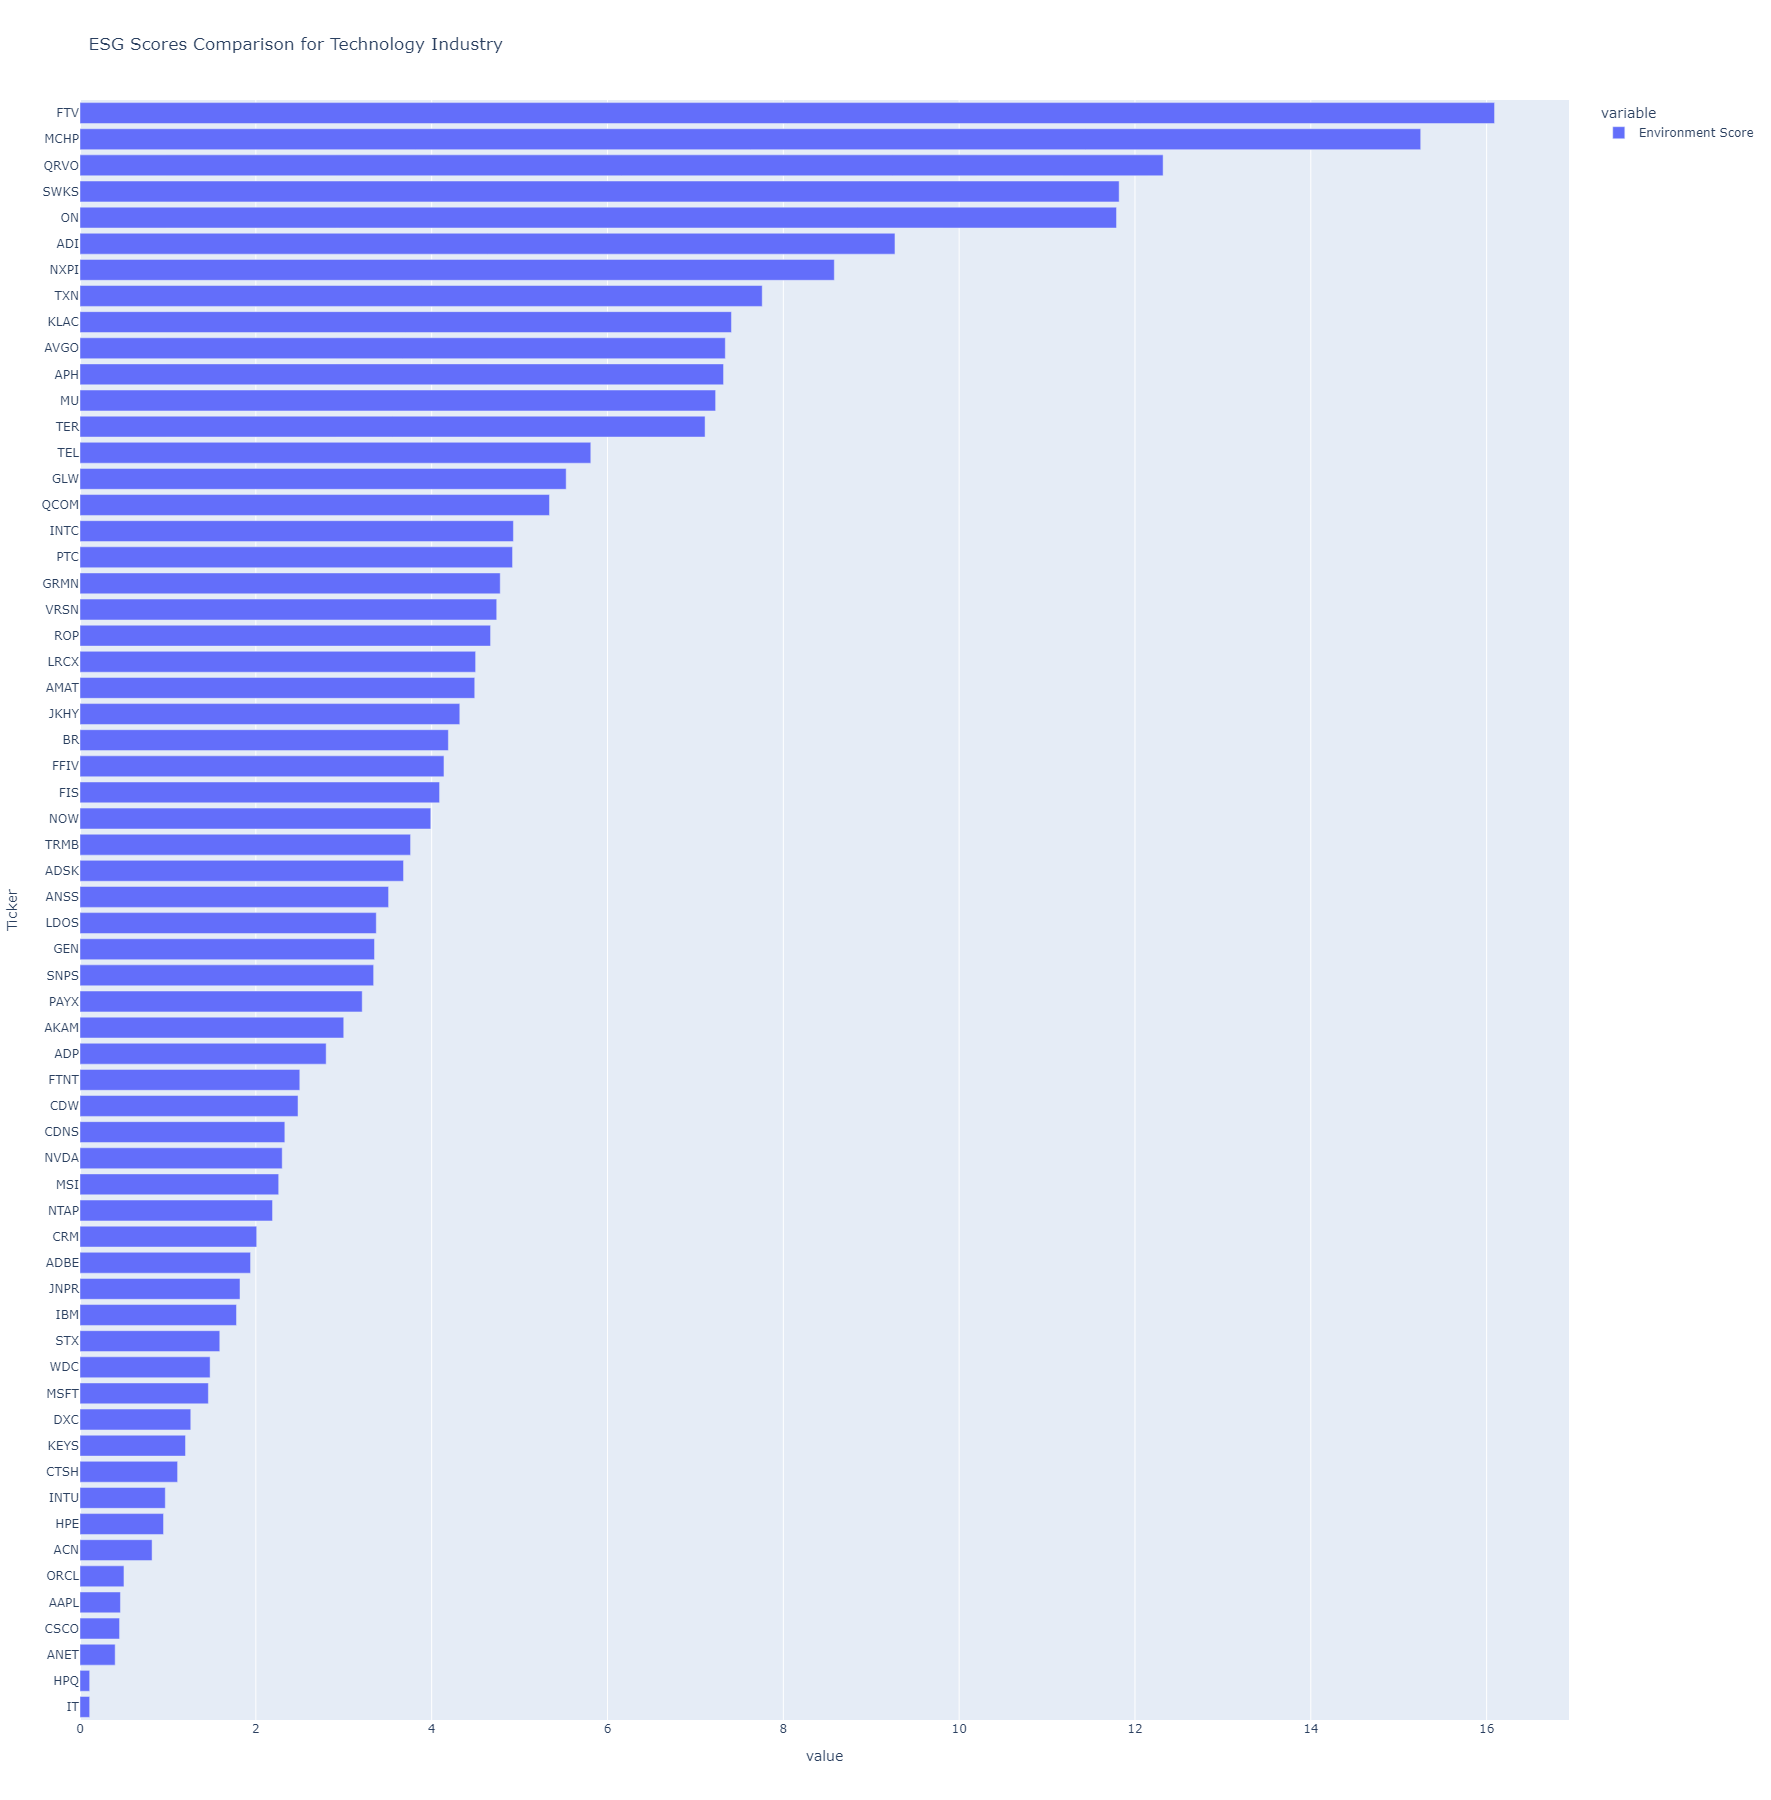

In [264]:
fig = px.bar(industry_df, 
             y='Ticker',  # Tickers on the y-axis
             x=['Environment Score'],  # ESG scores on the x-axis
             title=f'ESG Scores Comparison for {industry} Industry', 
             barmode='group',  # Group bars by ticker
             orientation='h',
             width=1000,  # Set the width of the figure
             height=1800)  # Set the height of the figure))  # Horizontal bars

# Update the layout to sort the bars by Environment Score
fig.update_layout(yaxis={'categoryorder':'total ascending'})  # Sorts from highest to lowest

# Show the plot
fig.show()

### Create Subplots for Each Pillar Score

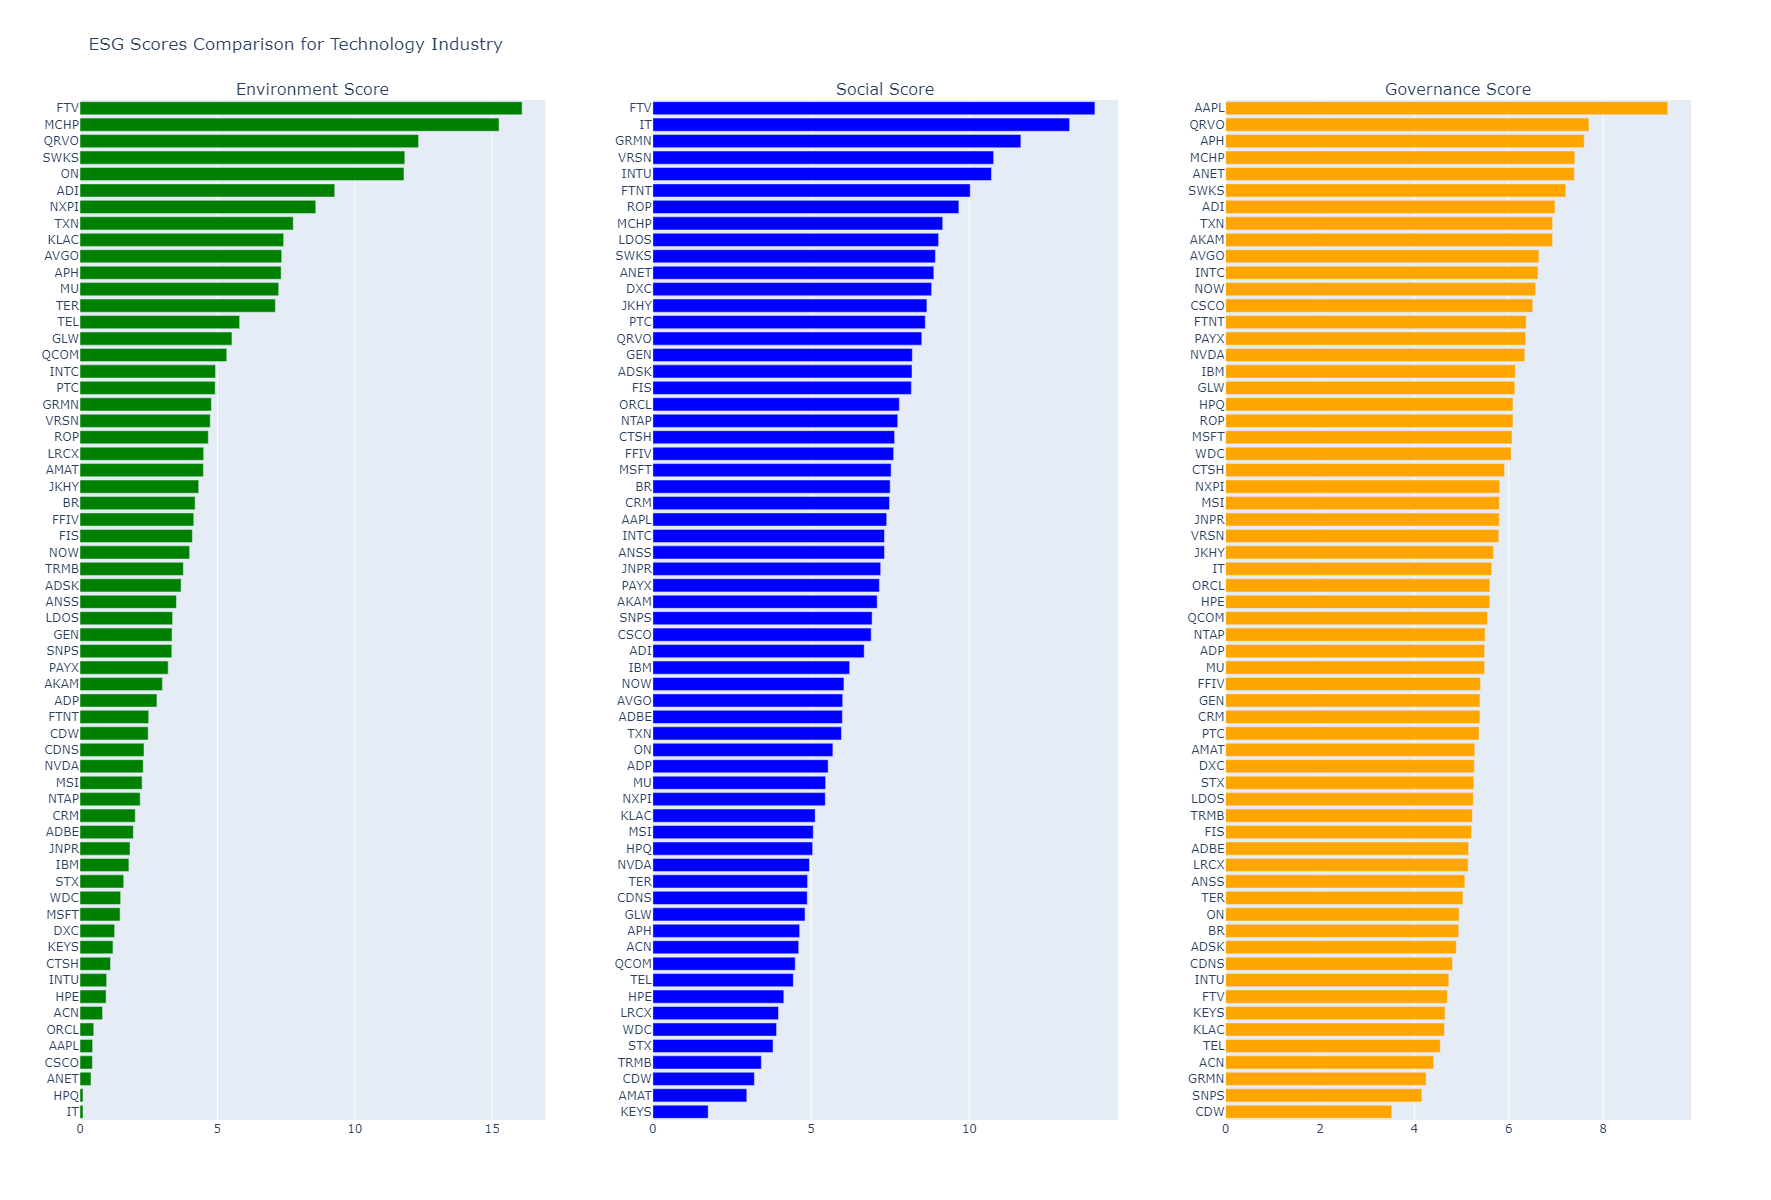

In [309]:
# Sort the DataFrame by each ESG pillar
industry_df_env = industry_df.sort_values(by='Environment Score', ascending=True)
industry_df_soc = industry_df.sort_values(by='Social Score', ascending=True)
industry_df_gov = industry_df.sort_values(by='Governance Score', ascending=True)

# Create subplots with 3 columns
fig = make_subplots(rows=1, cols=3, 
                    shared_yaxes=False,            # Ensures that each subplot has its own independent y-axis. This allows each subplot to have its own sorting based on the specific ESG score.
                    subplot_titles=("Environment Score", "Social Score", "Governance Score"))

# Environment Score plot
fig.add_trace(
    go.Bar(
        x=industry_df_env['Environment Score'],
        y=industry_df_env['Ticker'],
        orientation='h',
        marker=dict(color='green')
    ),
    row=1, col=1
)

# Social Score plot
fig.add_trace(
    go.Bar(
        x=industry_df_soc['Social Score'],
        y=industry_df_soc['Ticker'],
        orientation='h',
        marker=dict(color='blue')
    ),
    row=1, col=2
)

# Governance Score plot
fig.add_trace(
    go.Bar(
        x=industry_df_gov['Governance Score'],
        y=industry_df_gov['Ticker'],
        orientation='h',
        marker=dict(color='orange')
    ),
    row=1, col=3
)

# Update layout to make the plot look better
fig.update_layout(
    height=1200, 
    width=1600, 
    title_text=f'ESG Scores Comparison for {industry} Industry',
    showlegend=False
)

# Show the plot
fig.show()

## Plot your ESG data

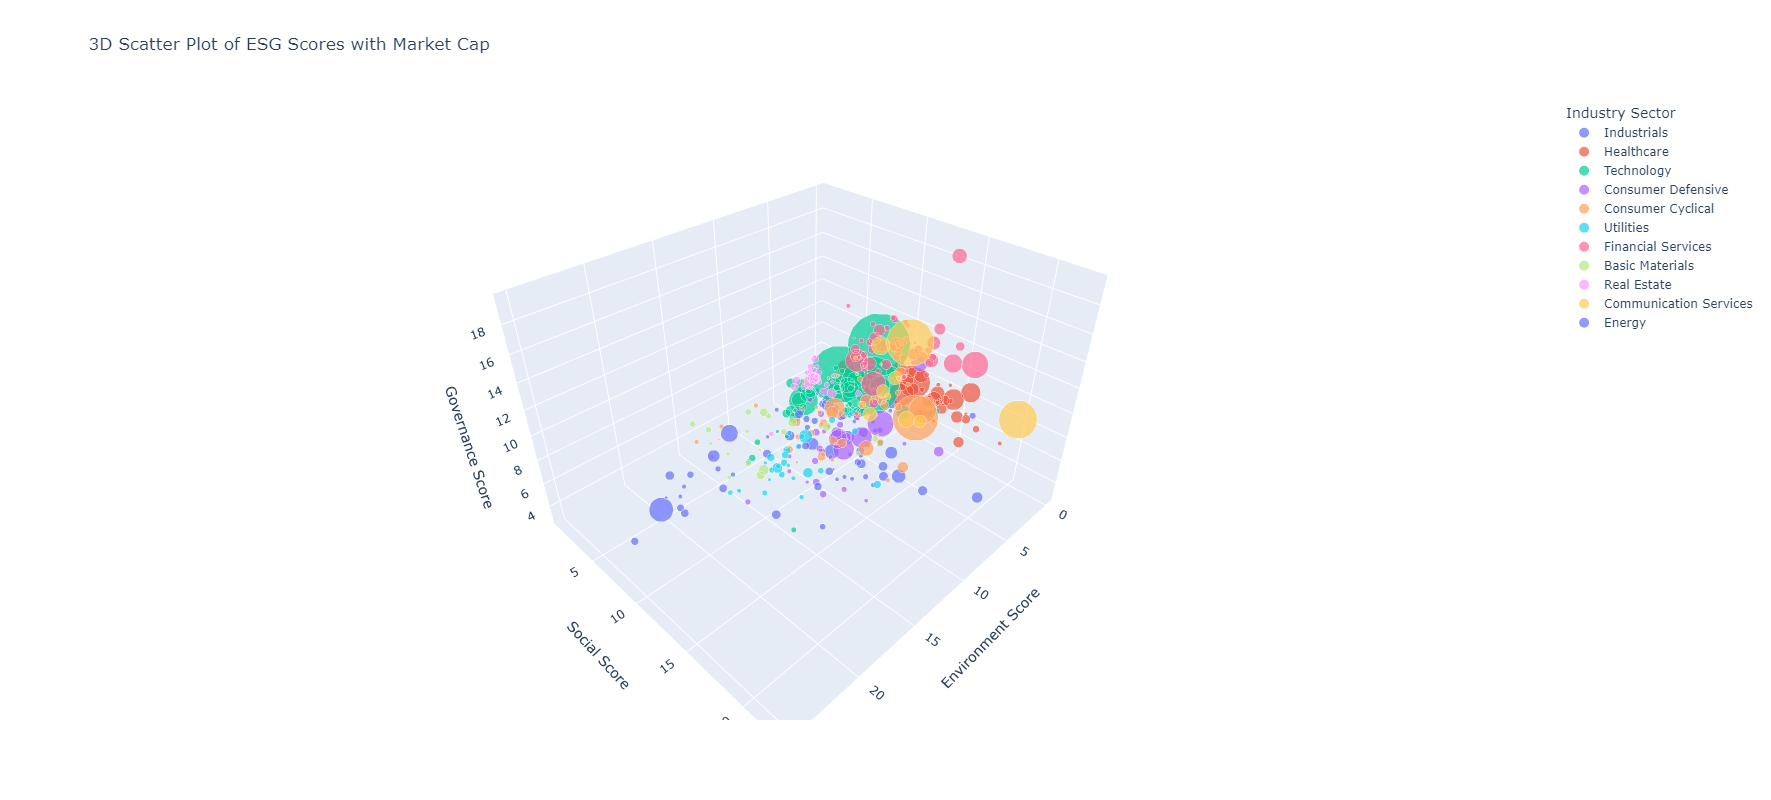

In [243]:
# Create the 3D scatter plot
fig = px.scatter_3d(df_clean, 
                    x='Environment Score', 
                    y='Social Score', 
                    z='Governance Score',
                    color='Industry Sector', 
                    size='Market Cap',
                    size_max=100,
                    opacity=0.7,  # Set the transparency
                    hover_name='Ticker',  # Display the ticker symbol on hover
                    title="3D Scatter Plot of ESG Scores with Market Cap",
                    width=1000,  # Set the width of the figure
                    height=800)  # Set the height of the figure)

# Show the plot
fig.show()